In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\JIO institute\Self-PROJECTS\Real_estate_price_prediction\bengaluru_house_prices.csv")

**Data Load: Load banglore home prices into a dataframe**

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Data Cleaning: Handle NA values**

In [7]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
df.groupby('area_type')['area_type'].agg('count')
# df['area_type'].value_counts()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df.dropna(subset=['location'], inplace=True)

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**intially drop the columns which are not essential in model for prediction**

In [12]:
df.drop(['area_type','society','balcony','availability',],axis = 'columns',inplace = True)

In [13]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**as looking at Null values i have two options - as our dataset is to large that we can drop the very little null values or best option is to fill them with their mean**

In [16]:
a = round(df['bath'].mean(),2)
df['bath'] = df['bath'].fillna(a)
df.dropna(subset = ['size'],inplace = True)

In [17]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [18]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

***Feature Engineering***

**Add new feature(integer) for bhk (Bedrooms Hall Kitchen) - looking at "size column" we can see that there lot of cleaning required based on entries , what i had done is extracted the "numbers" for each size and stored them as BHK column, as they represent the details of flat**

**also learn  how can we implement the loops on any columns and  transform it - we r changing the data type of bhk also**

In [22]:
bhk_list = []
for val in df['size']:
    if val and isinstance(val, str):
        bhk_list.append(int(val.split()[0]))
    else:
        bhk_list.append(None)

In [23]:
df['bhk'] = bhk_list

In [24]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


**Explore total_sqft feature - because of unstructured data - we r changing the data type of total_sqft also to float**

In [26]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
# this function return the o/p for which except statement is executed
df[~df['total_sqft'].apply(is_float)]  


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.00,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.00,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.00,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.69,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.00,59.135,2


In [28]:
def conv_sqft_to_num(x):
    n = x.split('-')
    if len(n) == 2:
        avg =( float(n[0]) + float(n[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [29]:
conv_sqft_to_num('2166')

2166.0

In [30]:
conv_sqft_to_num('2166-2266')

2216.0

In [31]:
df1 = df.copy()
df1['total_sqft'] = df1['total_sqft'].apply(conv_sqft_to_num)

In [32]:
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [33]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

**Feature Engineering**

**Add new feature called price per square feet**

In [36]:
df2 = df1.copy()
df2['price_per_sqft'] = round(df1['price']*100000/df1['total_sqft'],2)

In [37]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [38]:
df2.to_csv("bhp.csv",index=False)

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [40]:
len(df2.location.unique())

1304

In [41]:
df2['location'] =df2['location'].str.strip()

In [42]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [43]:
len(location_stats[location_stats<=10])

1052

**Dimensionality Reduction --
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [45]:
location_less_then_10 = (location_stats[location_stats<=10])
location_less_then_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [46]:
new_locations = []
for loc in df2['location']:
    if loc in location_less_then_10:
        new_locations.append('other')
    else:
        new_locations.append(loc)

In [47]:
df2['location'] = new_locations

In [48]:
len(df2.location.unique())

242

In [49]:
df2.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [50]:
df2[df2['bhk'] == 1].head().min()

location          Attibele
size                 1 BHK
total_sqft           450.0
bath                   1.0
price                 11.0
bhk                      1
price_per_sqft     2444.44
dtype: object

**Outlier Removal Using Business Logic --
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [52]:
df2[df2['total_sqft']/df2['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [53]:
df2.shape

(13303, 7)

In [54]:
df2.drop(df2[df2['total_sqft'] / df2['bhk'] < 300].index, inplace=True)

In [55]:
df2.shape

(12559, 7)

In [56]:
df2['price_per_sqft'].describe()

count     12513.000000
mean       6307.441655
std        4160.931637
min         267.830000
25%        4210.530000
50%        5295.010000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [57]:
Q1 = df2.price_per_sqft.quantile(0.25)
Q3 = df2.price_per_sqft.quantile(0.75)
Q1,Q3

(4210.53, 6916.67)

In [58]:
IQR = Q3-Q1
IQR

2706.1400000000003

In [59]:
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 - (1.5*IQR)
lower_limit,upper_limit

(151.31999999999925, 2857.4599999999996)

In [60]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(10286, 7)

In [61]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # import matplotlib.pyplot as plt
    # import matplotlib
    # import numpy as np
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    # Add jitter to avoid overlapping
    bhk2_sqft = bhk2.total_sqft + np.random.normal(0, 10, size=len(bhk2))
    bhk2_price = bhk2.price + np.random.normal(0, 0.1, size=len(bhk2))

    bhk3_sqft = bhk3.total_sqft + np.random.normal(0, 10, size=len(bhk3))
    bhk3_price = bhk3.price + np.random.normal(0, 0.1, size=len(bhk3))

    plt.scatter(bhk2_sqft, bhk2_price, color='blue', label='2 BHK', s=50, alpha=0.5)
    plt.scatter(bhk3_sqft, bhk3_price, marker='+', color='green', label='3 BHK', s=50, alpha=0.6)

    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(f"2 vs 3 BHK Price Comparison in {location}")
    plt.legend()
    plt.show()


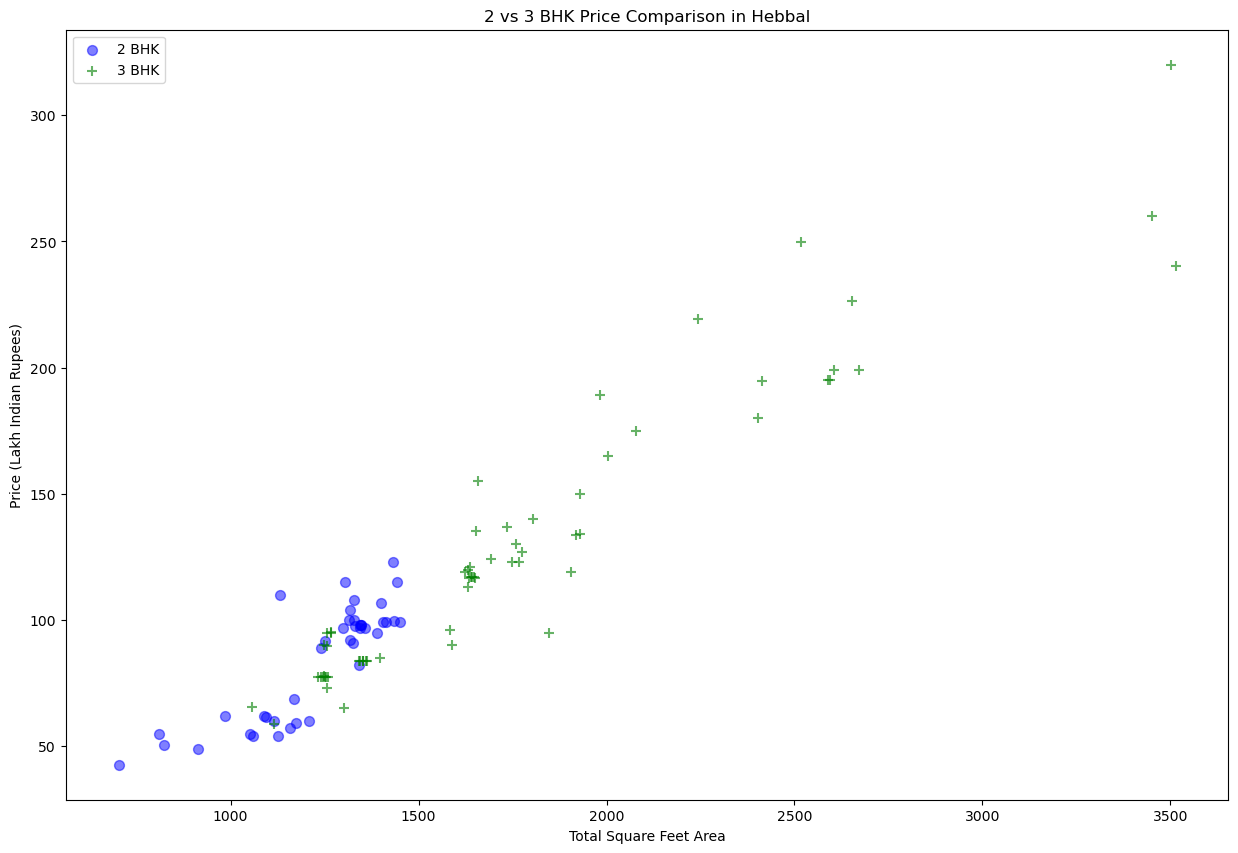

In [62]:
plot_scatter_chart(df3, "Hebbal")

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df4.shape

(7353, 7)

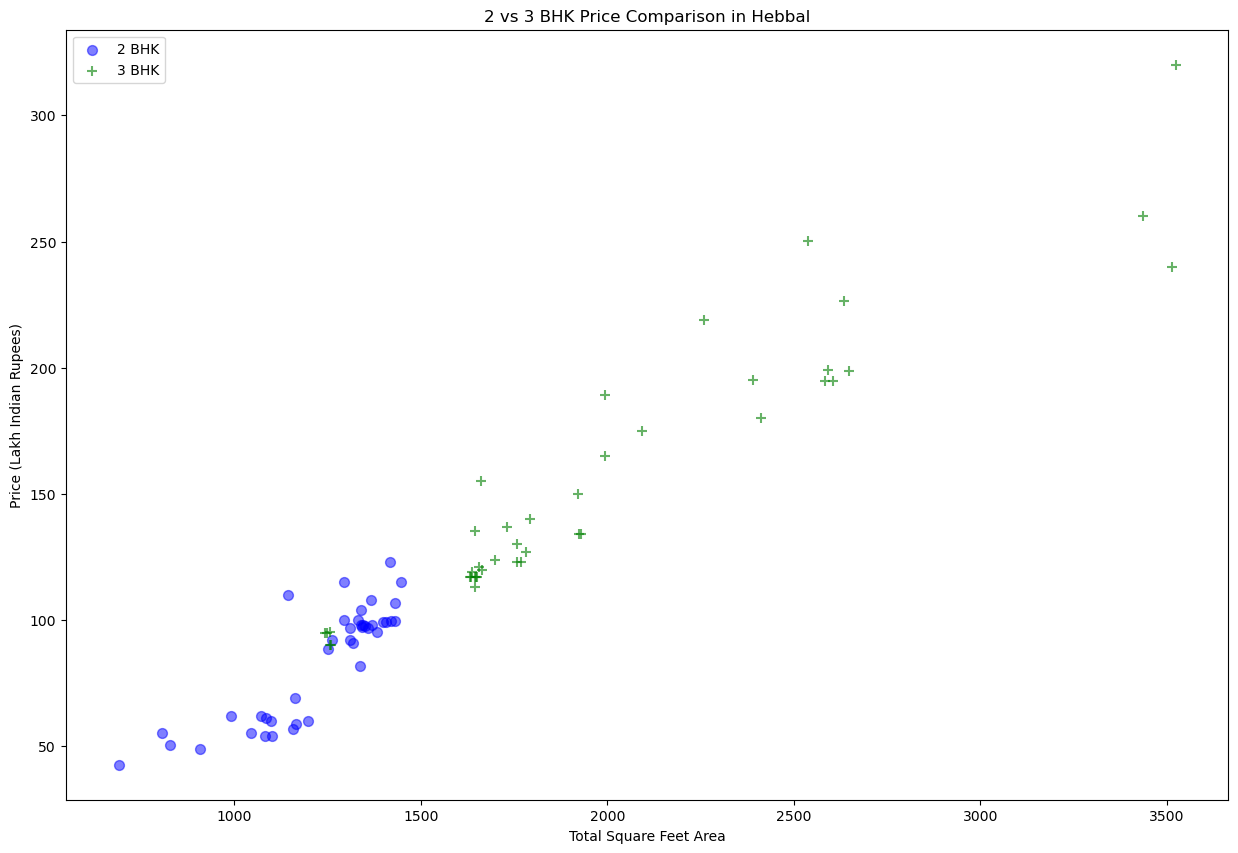

In [64]:
plot_scatter_chart(df4, "Hebbal")


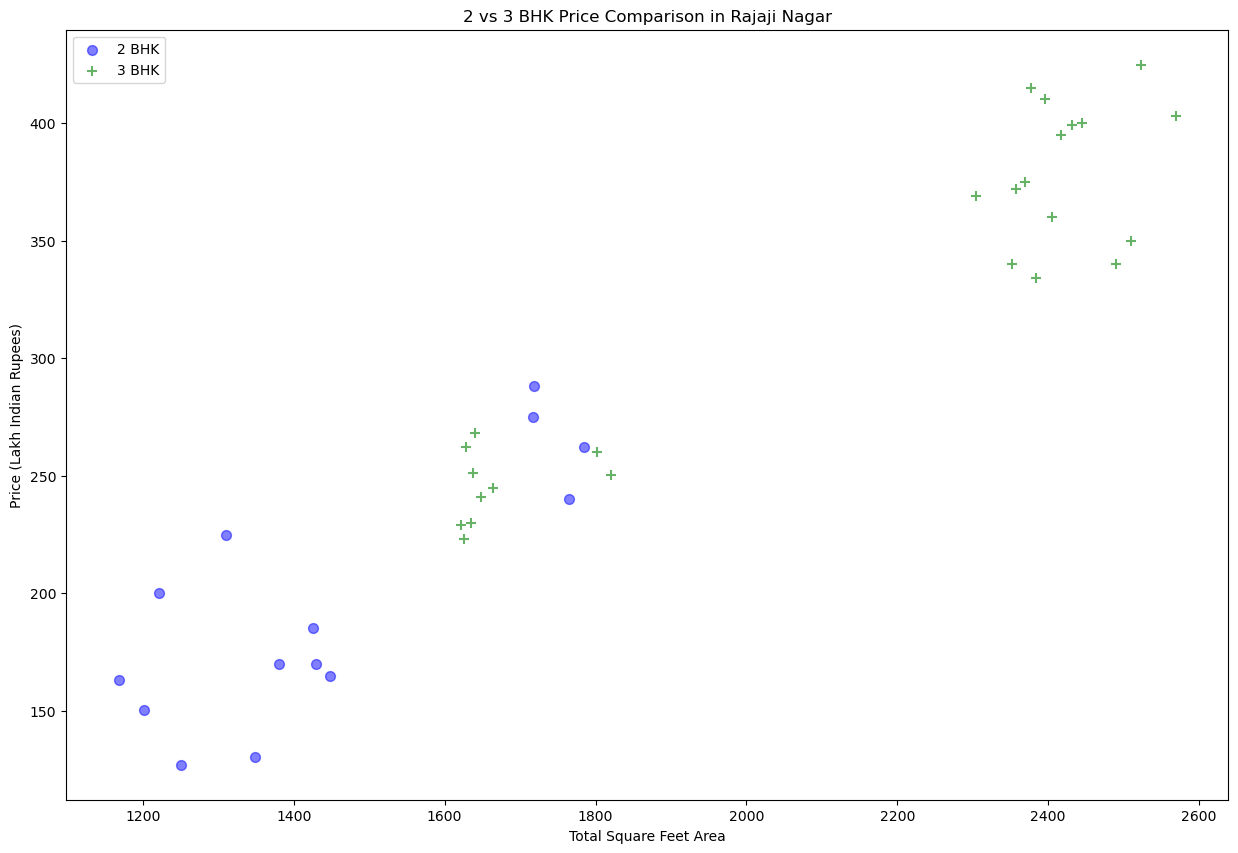

In [65]:
plot_scatter_chart(df4, "Rajaji Nagar")


In [66]:
df4[df4['bath']>df4['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8455,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [67]:
final_df = df4.drop(df4[df4['bath']>df4['bhk']+2].index)

In [68]:
final_df.shape

(7349, 7)

In [69]:
final_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [70]:
final_df.drop(columns=['size','price_per_sqft'], inplace=True)

In [71]:
final_df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [185]:
# final_df.to_csv('final_bengluru_ML_model.csv')

In [73]:
final_df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


**CONCEPT OF MACHINE LEARNING**

**concept of Dummy Variables & One Hot Encoding**

In [187]:
encoded_df = pd.get_dummies(final_df.location)
encoded_df = encoded_df.astype(int)
encoded_df

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [189]:
new_df = pd.concat([final_df,encoded_df.drop(columns = 'other')],axis = 'columns')

In [210]:
new_df.head()

10.0


In [194]:
new_df.drop(columns = 'location',inplace = True)
new_df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Assigning the feature variables X and y**

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [198]:
X = new_df.drop(columns  = 'price')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
y = new_df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [202]:
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10 )

In [204]:
X_train.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2950,1800.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3171,985.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4123,2775.0,3.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,515.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4429,750.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
X_test.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5449,1198.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,520.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2601,1203.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4010,930.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6386,740.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
y_train.head()

2950    150.0
3171     67.0
4123    165.0
1303     25.0
4429     36.5
Name: price, dtype: float64

In [218]:
X_test.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5449,1198.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,520.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2601,1203.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4010,930.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6386,740.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
y_train.head()

2950    150.0
3171     67.0
4123    165.0
1303     25.0
4429     36.5
Name: price, dtype: float64

In [222]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [226]:
y_pred = lr.predict(X_test)
y_pred

array([ 73.79281006,   9.60456415,  57.76715187, ...,  65.95268028,
       158.60719183, 148.34254951])

In [248]:
print(lr.score(X_test,y_test))
R2_score = r2_score(y_test,y_pred)
print("R2 score: ",R2_score)

0.8827126224006817
R2 score:  0.8827126224006817


**CONCEPT OF CROSS VALIDATION**

In [236]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2,random_state = 10)
scores = cross_val_score(LinearRegression(),X,y,cv = cv)
scores

array([0.88271262, 0.82454627, 0.84292649, 0.78377287, 0.85487925])

**GRID SEARCH CV**

In [268]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
# import pandas as pd

In [286]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # Removed 'normalize'
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # 'mse' renamed to 'squared_error'
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.822836,{}
1,lasso,0.694117,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.613321,"{'criterion': 'friedman_mse', 'splitter': 'random'}"


**Test the model for few properties**

In [ ]:
# def predict_price(location,sqft,bath,bhk):    
#     loc_index = np.where(X.columns==location)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return lr.predict([x])[0]

In [293]:
def predict_price(location, sqft, bath, bhk):
    input_data = pd.DataFrame([[sqft, bath, bhk]], columns=X.columns[:3])
    
    if location in X.columns:
        input_data[location] = 1
    else:
        # Fill all other location columns with 0
        for col in X.columns[3:]:
            input_data[col] = 0

    # Ensure all expected columns are present
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    
    return lr.predict(input_data)[0]

In [295]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.87285656560162

In [297]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

90.78879105595651

In [299]:
predict_price('Rajaji Nagar',1000, 2, 2)

227.13288793714713

In [301]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)